In [4]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import torch
import pandas as pd
import ott
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from utils.utils import bucket_outcomes, prep_labels, cross_entropy, mean_cross_entropy_df, mean_cross_entropy, get_frequent_players_only, weighted_avg

from pathlib import Path
import os
from models.naive_model import NaiveModel
from models.naivest_model import NaivestModel
from models.reg_naive_model import RegNaiveModel
from models.model_assessor import ModelAssessor
from models.pooling_model import PoolingModel

import torch

In [2]:
torch.tensor(1.)

tensor(1.)

In [24]:
p_data = Path("../data/raw_pitch_data/")
train_data = pd.concat([pd.read_csv(p_data / csv_path) for csv_path in os.listdir(p_data)[5:10]])
model_assessor = ModelAssessor(train_data)

In [25]:
pooling_model = PoolingModel(pooling_strength=0.8)
pooling_model.fit(train_data)

In [26]:
pooling_model.predict_df(train_data)

,double_or_triple,fielded_out,home_run,other,single,strikeout,walk
0,0.046390,0.435230,0.040372,0.014841,0.135508,0.230099,0.097560
1,0.032545,0.305407,0.025696,0.005814,0.092715,0.257581,0.280243
2,0.032545,0.305407,0.025696,0.005814,0.092715,0.257581,0.280243
3,0.046234,0.355442,0.021095,0.013889,0.089995,0.361426,0.111918
4,0.046234,0.355442,0.021095,0.013889,0.089995,0.361426,0.111918
...,...,...,...,...,...,...,...
473833,0.056403,0.361767,0.051857,0.010188,0.137815,0.227449,0.154522
473834,0.037377,0.381832,0.051326,0.015109,0.103906,0.165657,0.244794
473835,0.045914,0.406035,0.043926,0.020581,0.142870,0.203620,0.137055
473836,0.055854,0.440632,0.039054,0.018687,0.154672,0.220476,0.070626


In [11]:
pooling_model.pitcher_outcomes_tensor.shape

(748, 4, 3, 7)

In [49]:
pts = np.linspace(0, 6203)


[autoreload of models.pooling_model failed: Traceback (most recent call last):
  File "/home/packer.61/mambaforge/envs/pyml/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/packer.61/mambaforge/envs/pyml/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/home/packer.61/mambaforge/envs/pyml/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/packer.61/Documents/baseball/new/models_2/m

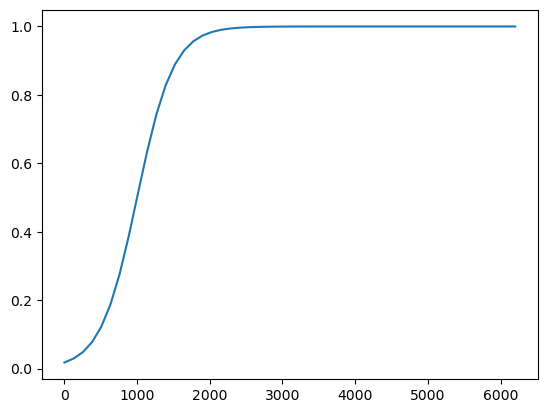

In [48]:
logit(pts)
plt.plot(pts, logit(pts))
